<a href="https://colab.research.google.com/github/19pa1a0586/AI/blob/master/Natural_Language_Processing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Assignment
In this assignment you will learn to do some data cleaning, prepare your features and do some K Means clustering on the data.

[Download data from here](https://drive.google.com/open?id=1ozz0zITDG8wOSQtwop2NC7AM_T3O59nj)

Load it as a pandas dataframe


In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

# Loaded data as a pandas dataframe  
df=pd.read_csv("amazon_co-ecommerce_sample - amazon_co-ecommerce_sample.csv")
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


uniq_id  ...                                            sellers
0     eac7efa5dbd3d667f26eb3d3ab504464  ...  {"seller"=>[{"Seller_name_1"=>"Amazon.co.uk", ...
1     b17540ef7e86e461d37f3ae58b7b72ac  ...  {"seller"=>{"Seller_name_1"=>"UHD WHOLESALE", ...
2     348f344247b0c1a935b1223072ef9d8a  ...  {"seller"=>[{"Seller_name_1"=>"DEAL-BOX", "Sel...
3     e12b92dbb8eaee78b22965d2a9bbbd9f  ...                                                NaN
4     e33a9adeed5f36840ccc227db4682a36  ...                                                NaN
...                                ...  ...                                                ...
9995  44d6967f083825a5de36ad4865a65bcd  ...  {"seller"=>[{"Seller_name_1"=>"Star Action Fig...
9996  08f0747b6fc6687215ffb994c3a6fb32  ...                                                NaN
9997  bf6cc073f8f24e6e338190fa16f6ee9d  ...  {"seller"=>[{"Seller_name_1"=>"YUK", "Seller_p...
9998  cd783d0b8b44e631b9788b203eaaefae  ...  {"seller"=>[{"Seller_name_1"=>"Smaller World F...
9999  94d18e86e504bee1e392df7e5738b18a  ...                                                NaN

[10000 rows x 17 columns]

We are interested in customer_reviews column. However, the column is not clean data. It contains review title, rating, date, customer name, and review all in one scell separated by //

[Read this tutorial](https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/)

Extract the customer reviews in another dataframe and separate each of the components


In [0]:
# Check whether the customer_review column has null values or not
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     652
product_information                              58
product_description                             652
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

**After checking the customer_review column.we have 21 null values.As the customer_review column datatype is "object", we need to fill the null values with "Mode" values.**

In [0]:
# Filling (or) Replacing the nan values of customer_review column with mode values
df["customer_reviews"].fillna(df["customer_reviews"].value_counts().index[0],inplace=True)
# After Replacing the nan values of the customer_reviews column
df.isna().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     652
product_information                              58
product_description                             652
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                  0
sellers                                        3082
dtype: int64

In [0]:
# We need to split (or) seperate the data in the "customer_reviews" column using the str.split() method
# Syntax: Series.str.split(pat=None, n=-1, expand=False)
new_set=df["customer_reviews"].str.split("//",n=4,expand=True)

# Creat Empty Dataframe to grop the splited (or) seperated data
cr=pd.DataFrame()

In [0]:
# Making seperate colunms with specified names from new_set dataframe
cr["review_title"]=new_set[0]
cr["rating"]=new_set[1]
cr["date"]=new_set[2]
cr["customer_name"]=new_set[3]
cr["review"]=new_set[4]
cr=cr.drop("Customer_name",axis=1)
cr

review_title  ...                                             review
0        Worth Buying For The Pictures Alone (As Ever)   ...   Part of the magic for me growing up as a boy ...
1                                           Four Stars   ...   Very happy with the communication with funkyb...
2                              **Highly Recommended!**   ...   Simple & GREAT FUN for 5+My nephews face was ...
3                                            I love it   ...   I love it. Perfect with the earlier ordered l...
4                                     Birthday present   ...   Bought this for my Grandson's birthday.  He i...
...                                                 ...  ...                                                ...
9995                                         Realistic   ...   Very true to the Batman classic series of the...
9996  ... what I see my grandson us going to have fu...  ...   Its a Christmas present however from what I s...
9997                                        Five Stars   ...                     arrived in excellent condition
9998                        The best sculpt in a while   ...   Okay, Hal Jordan figures come and go. There i...
9999                                       Gold leader   ...   1st class kit top marks to bandai if your not...

[10000 rows x 5 columns]

Now the customer name column needs to be cleaned. Extract only the customer name and remove the By and on part in similar manner. This time you need to split by '\n'

In [0]:
# We have to replace the nan values of "Customer_name" with "Mode" as the datatype of "Customer_name" column is "object"
cr["customer_name"].fillna(cr["customer_name"].value_counts().index[0],inplace=True)

# There are no more nan values 
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_title   10000 non-null  object
 1   rating         10000 non-null  object
 2   date           10000 non-null  object
 3   customer_name  10000 non-null  object
 4   review         10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


In [0]:
# We need to split (or) seperate the data in the "customer_name" column using the str.split() method
# Syntax: Series.str.split(pat=None, n=-1, expand=False)
new=cr["customer_name"].str.split("\n",n=3,expand=True)

# Making seperate colunm called "Customer_name" that contains only name of the customers from new dataframe
cr["Customer_name"]=new[2]

# Drop the "customer_name" column that contains differnt data which we don't want
rc=cr.drop("customer_name",axis=1)
rc

review_title  ...        Customer_name
0        Worth Buying For The Pictures Alone (As Ever)   ...          Copnovelist
1                                           Four Stars   ...         kenneth bell
2                              **Highly Recommended!**   ...          Simon.B :-)
3                                            I love it   ...         Lilla Lukacs
4                                     Birthday present   ...          Love my Dog
...                                                 ...  ...                  ...
9995                                         Realistic   ...                  Ray
9996  ... what I see my grandson us going to have fu...  ...             Janet R.
9997                                        Five Stars   ...      Amazon Customer
9998                        The best sculpt in a while   ...            Sodam Yat
9999                                       Gold leader   ...        graham mccoid

[10000 rows x 5 columns]

In [0]:
# Here we can see how many members rate for each.i.e,rating from 1 to 5
pd.value_counts(rc["rating"])

 5.0                                                                7514
 4.0                                                                1876
 3.0                                                                 385
 2.0                                                                 117
 1.0                                                                 107
www.amazon.co.uk/gp/product/B002FVJ8EQ/ref=cm_cr_rev_prod_title        1
Name: rating, dtype: int64

In [0]:
# Here we replaced the unique value with rating 5
r=rc['rating'].unique().tolist()
rc["rating"].replace(r[5],r[1],inplace=True)
pd.value_counts(rc["rating"])


 5.0     7515
 4.0     1876
 3.0      385
 2.0      117
 1.0      107
Name: rating, dtype: int64

In [0]:
# As the "rating" column is "object".so,we need to convert it to "integer" 
for i in range(10000):
    rc["rating"][i]=int(float(rc["rating"][i]))
    

In [0]:
rc.head()

review_title  ...     Customer_name
0  Worth Buying For The Pictures Alone (As Ever)   ...       Copnovelist
1                                     Four Stars   ...      kenneth bell
2                        **Highly Recommended!**   ...       Simon.B :-)
3                                      I love it   ...      Lilla Lukacs
4                               Birthday present   ...       Love my Dog

[5 rows x 5 columns]

Create another column nlpreview and copy the review column as it is
apply removal of punctuation and extract all words as a list of words. 

**Hint**: You may have to use [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) on dataframe series with a lambda function that does your tokenization etc. You can use sentence/word tokenizer but you will get extra credit if you use RegExpTokenizer. [Documentation for help](https://kite.com/python/docs/nltk.tokenize)

In [0]:
# Here we have imported "stopwords" nd "punctuation" and grouped them as a set into "customStopWords"
from nltk.corpus import stopwords 
nltk.download('stopwords')
from string import punctuation   
customStopWords=set(stopwords.words('english')+list(punctuation))   



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Remove stopwords in the nlpreview column

In [0]:
# We need to Import "Regular-Expression Tokenizer" and "WordNetLemmatizer" to find Lemmatization
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+//')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wt=WordNetLemmatizer()

def text(txt):
  tokens=tokenizer.tokenize(txt)
  txt=" ".join([wt.lemmatize(word) for word in tokens if word not in customStopWords])
  return txt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# Here we have divided the ratings as 1,2 as positives(1's) and 4,5 as negatives(0's)
def Grouping(x):
  if x!=3:
    if x==4 or x==5:
      return 1
    elif x==1 or x==2:
      return 0

In [0]:
# Creating new columns "sentiment" and "nlpreview" and coping the divided rating values into "sentiment" column and coping the lemmatized sentences into "nlpreview" column
rc["sentiment"]=rc["rating"].apply(lambda a:Grouping(a))
rc["nlpreview"]=rc["review"].apply(lambda x:text(str(x)))
rc

review_title  ...                                          nlpreview
0        Worth Buying For The Pictures Alone (As Ever)   ...  Part magic growing boy buy given new Hornby ca...
1                                           Four Stars   ...  Very happy communication funkybuys Five Stars ...
2                              **Highly Recommended!**   ...  Simple GREAT FUN 5 My nephew face amazing open...
3                                            I love it   ...  I love Perfect earlier ordered locomotive Agai...
4                                     Birthday present   ...  Bought Grandson birthday He currently collecti...
...                                                 ...  ...                                                ...
9995                                         Realistic   ...  Very true Batman classic series 1960 highly re...
9996  ... what I see my grandson us going to have fu...  ...  Its Christmas present however I see grandson u...
9997                                        Five Stars   ...                        arrived excellent condition
9998                        The best sculpt in a while   ...  Okay Hal Jordan figure come go There new one a...
9999                                       Gold leader   ...  1st class kit top mark bandai good painting do...

[10000 rows x 7 columns]

In [0]:
# Checking the number of 1's and 0's present in the created "sentiment" column
pd.value_counts(rc["sentiment"])

1.0    9391
0.0     224
Name: sentiment, dtype: int64

In [0]:
# We replaced the null with 0 due to worst case
rc['sentiment'].fillna(0.0,inplace=True)
pd.value_counts(rc["sentiment"])

1.0    9391
0.0     609
Name: sentiment, dtype: int64

In [0]:
# Here we have split the sentence into list of words
tok = RegexpTokenizer('\S+')
res=rc["nlpreview"].apply(lambda x:tok.tokenize(str(x)))
res

0       [Part, magic, growing, boy, buy, given, new, H...
1       [Very, happy, communication, funkybuys, Five, ...
2       [Simple, GREAT, FUN, 5, My, nephew, face, amaz...
3       [I, love, Perfect, earlier, ordered, locomotiv...
4       [Bought, Grandson, birthday, He, currently, co...
                              ...                        
9995    [Very, true, Batman, classic, series, 1960, hi...
9996    [Its, Christmas, present, however, I, see, gra...
9997                      [arrived, excellent, condition]
9998    [Okay, Hal, Jordan, figure, come, go, There, n...
9999    [1st, class, kit, top, mark, bandai, good, pai...
Name: nlpreview, Length: 10000, dtype: object

In [0]:
# Here we have grouped all the words into single list of words
res2=[]
i=0
while i<10000:
  res2=res2+res[i]
  i=i+1
res2

['Part',
 'magic',
 'growing',
 'boy',
 'buy',
 'given',
 'new',
 'Hornby',
 'catalogue',
 'every',
 'year',
 'even',
 'included',
 '90',
 'product',
 'previous',
 'year',
 'I',
 'still',
 'got',
 'old',
 'one',
 'dating',
 'back',
 '70',
 '80',
 'somewhere',
 'These',
 'day',
 'catalogue',
 'especially',
 'informative',
 'tell',
 'vintage',
 'rolling',
 'stock',
 'useful',
 'dedicating',
 'railway',
 'one',
 'particular',
 'era',
 'train',
 'company',
 'Amazing',
 'detail',
 'fabulous',
 'photography',
 '5',
 '0',
 '11',
 'April',
 '2015',
 'By',
 'richard',
 '11',
 'April',
 '2015',
 'Amazing',
 'detail',
 'every',
 'credit',
 'photographer',
 'book',
 'worthy',
 'reference',
 'manual',
 'well',
 'sale',
 'brochure',
 'even',
 'passing',
 'interest',
 'hobby',
 'transported',
 'another',
 'time',
 'younger',
 'awe',
 'big',
 'train',
 'Great',
 'Purchase',
 '5',
 '0',
 '23',
 'April',
 '2014',
 'By',
 'Pinkhandbag',
 '23',
 'April',
 '2014',
 'This',
 'purchased',
 'behalf',
 'Dad',


Use stemming/lemmatization. There are several options, so [read the docs](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python).

In [0]:
# Here we are finding "stemm_words" (or) "root_words" from the previously created "words" list
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
stemm_Words=[st.stem(word) for word in res2]
stemm_Words

['part',
 'mag',
 'grow',
 'boy',
 'buy',
 'giv',
 'new',
 'hornby',
 'catalog',
 'every',
 'year',
 'ev',
 'includ',
 '90',
 'produc',
 'prevy',
 'year',
 'i',
 'stil',
 'got',
 'old',
 'on',
 'dat',
 'back',
 '70',
 '80',
 'somewh',
 'thes',
 'day',
 'catalog',
 'espec',
 'inform',
 'tel',
 'vint',
 'rol',
 'stock',
 'us',
 'ded',
 'railway',
 'on',
 'particul',
 'er',
 'train',
 'company',
 'amaz',
 'detail',
 'fab',
 'photograph',
 '5',
 '0',
 '11',
 'april',
 '2015',
 'by',
 'richard',
 '11',
 'april',
 '2015',
 'amaz',
 'detail',
 'every',
 'credit',
 'photograph',
 'book',
 'worthy',
 'ref',
 'man',
 'wel',
 'sal',
 'broch',
 'ev',
 'pass',
 'interest',
 'hobby',
 'transport',
 'anoth',
 'tim',
 'young',
 'aw',
 'big',
 'train',
 'gre',
 'purchas',
 '5',
 '0',
 '23',
 'april',
 '2014',
 'by',
 'pinkhandb',
 '23',
 'april',
 '2014',
 'thi',
 'purchas',
 'behalf',
 'dad',
 'he',
 'alway',
 'ask',
 'look',
 '00',
 'gaug',
 'engin',
 'onlin',
 'good',
 'buy',
 'look',
 'anytim',
 'w

In [0]:
# Here we are finding lemmatized_words and lemmatization keeps words sensible
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def get_lemma(words):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for word in words:
        lemma.append(wordnet_lemmatizer.lemmatize(word))
    return lemma
word=get_lemma(res2)
word

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Part',
 'magic',
 'growing',
 'boy',
 'buy',
 'given',
 'new',
 'Hornby',
 'catalogue',
 'every',
 'year',
 'even',
 'included',
 '90',
 'product',
 'previous',
 'year',
 'I',
 'still',
 'got',
 'old',
 'one',
 'dating',
 'back',
 '70',
 '80',
 'somewhere',
 'These',
 'day',
 'catalogue',
 'especially',
 'informative',
 'tell',
 'vintage',
 'rolling',
 'stock',
 'useful',
 'dedicating',
 'railway',
 'one',
 'particular',
 'era',
 'train',
 'company',
 'Amazing',
 'detail',
 'fabulous',
 'photography',
 '5',
 '0',
 '11',
 'April',
 '2015',
 'By',
 'richard',
 '11',
 'April',
 '2015',
 'Amazing',
 'detail',
 'every',
 'credit',
 'photographer',
 'book',
 'worthy',
 'reference',
 'manual',
 'well',
 'sale',
 'brochure',
 'even',
 'passing',
 'interest',
 'hobby',
 'transported',
 'another',
 'time',
 'younger',
 'awe',
 'big',
 'train',
 'Great',
 'Purchase',
 '5',
 '0',
 '23',
 'April',
 '2014',
 'By',
 'Pinkhandbag',
 '23',
 'April',
 '2014',
 'This',
 'purchased',
 'behalf',
 'Dad',


Find the first 100 most important words, i.e. most frequently used words and plot them using FreqDist plot in nltk. See the sample colab file given during class. Note your observations.

In [0]:
# Calculates the frequency distribution for each word in the data. Use nltk.probability from FreqDist and matplotlib.
from nltk.probability import FreqDist

def plot_freq_dist(words,num_words = 20):
    plt.figure(figsize=(20,5))
    fdist = FreqDist(words)
    fdist.plot(num_words,cumulative=False)   

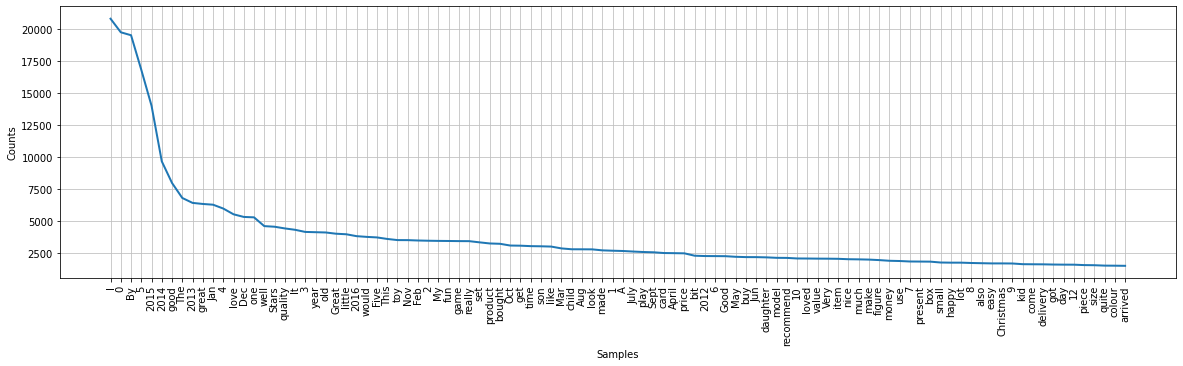

In [0]:
plot_freq_dist(res2,num_words=100) 

Create another column called TFIDF and use the nlpreview to construct tfidf in this newly created column

**Count Vectorization**

In [0]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

def get_bag_of_words(sentences):
    vectorizer = CountVectorizer()
    print(vectorizer.fit_transform(sentences).todense())
    print(vectorizer.vocabulary_) 
    print(vectorizer.get_feature_names())

In [0]:
get_bag_of_words(rc["nlpreview"])

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'part': 22106, 'magic': 18460, 'growing': 13371, 'boy': 4506, 'buy': 5085, 'given': 12766, 'new': 20776, 'hornby': 14566, 'catalogue': 5526, 'every': 10609, 'year': 33376, 'even': 10588, 'included': 15131, '90': 980, 'product': 23632, 'previous': 23505, 'still': 28726, 'got': 13038, 'old': 21381, 'one': 21444, 'dating': 8032, 'back': 3033, '70': 874, '80': 928, 'somewhere': 27916, 'these': 30119, 'day': 8086, 'especially': 10495, 'informative': 15262, 'tell': 29869, 'vintage': 32087, 'rolling': 25576, 'stock': 28759, 'useful': 31731, 'dedicating': 8259, 'railway': 24232, 'particular': 22119, 'era': 10436, 'train': 30802, 'company': 6754, 'amazing': 1931, 'detail': 8599, 'fabulous': 10954, 'photography': 22618, '11': 84, 'april': 2384, '2015': 370, 'by': 5112, 'richard': 25321, 'credit': 7489, 'photographer': 22616, 'book': 4348, 'worthy': 33166, 'reference': 24702, '

**TFIDF Vectorization**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(stop_words='english')
TFIDF= vectorizer.fit_transform(rc["nlpreview"])
print(TFIDF)
print(type(TFIDF))

  (0, 28980)	0.044612706870094165
  (0, 23819)	0.04901933141704899
  (0, 23435)	0.06391503197547456
  (0, 5011)	0.10051926633440356
  (0, 17133)	0.06811525985124696
  (0, 14448)	0.09623684544088708
  (0, 28340)	0.061297448500965517
  (0, 27688)	0.10051926633440356
  (0, 15131)	0.07059557677949531
  (0, 8002)	0.06836378306996341
  (0, 21112)	0.06448380839734681
  (0, 23254)	0.03160353775805151
  (0, 6082)	0.03210298556839899
  (0, 12186)	0.05450479916253034
  (0, 15230)	0.09319841946261775
  (0, 10816)	0.049397839667402375
  (0, 18587)	0.06575516068998688
  (0, 349)	0.07572875765648772
  (0, 5468)	0.09623684544088708
  (0, 3074)	0.07342891379961841
  (0, 7997)	0.05745333736865044
  (0, 8126)	0.11066973903435103
  (0, 20671)	0.05730126497144396
  (0, 22483)	0.11933643982740723
  (0, 12743)	0.14854860965105937
  :	:
  (9999, 29916)	0.09479491465760219
  (9999, 18003)	0.020686650819118853
  (9999, 28305)	0.0710874769721806
  (9999, 21193)	0.03949179660776912
  (9999, 42)	0.0494896572399763

In [0]:
vectorizer.get_feature_names()

['00',
 '000',
 '0000000',
 '00201chess',
 '00262',
 '007',
 '007th',
 '009',
 '00am',
 '00bay',
 '00wbx6zdn4whkg2514ex',
 '01',
 '01772jane',
 '02',
 '02425',
 '02431',
 '02754',
 '0275615',
 '03',
 '03050',
 '03nj3eegg4pfr9z0evpg',
 '04',
 '05',
 '06',
 '07',
 '070913gt',
 '08',
 '09',
 '0908713',
 '0_lisa_0',
 '0dsmtqxe1qhdgb2yr2nc',
 '0e1t6654m0j89np4kf3w',
 '0e9cs6j88jgwbm74zrav',
 '0ex0f2b9hbvwkba6cx25',
 '0f6j4mcntpsw5mk87589',
 '0mp',
 '0mvt6x13m4hjz3nq3tdf',
 '0q67z0smwrv8gr4qz1rb',
 '0qp39g6afys9y12et7fp',
 '0tsx09xrrxqw87s3r1v1',
 '0x1',
 '10',
 '100',
 '1000',
 '10000',
 '1000pc',
 '100mph',
 '100th',
 '100x',
 '100yrs',
 '101',
 '1010',
 '101231',
 '103',
 '104',
 '105',
 '1077',
 '107g',
 '1080p',
 '108mv8czqckjkqcac4ar',
 '109',
 '10cant',
 '10cm',
 '10colours',
 '10ft',
 '10jun14',
 '10kgs',
 '10m',
 '10mins',
 '10minute',
 '10minutes',
 '10mm',
 '10mph',
 '10p',
 '10pm',
 '10pound',
 '10pounds',
 '10th',
 '10would',
 '10x5',
 '10x7',
 '10yo',
 '10yr',
 '10yrs',
 '11',


Find the top 100 words with maximum TF IDF score and plot it. Note your observations and see how different it is from the Top 100 highest frequency words.

In [0]:
# Calculates the frequency distribution for each word in the data. Use nltk.probability from FreqDist and matplotlib.
from nltk.probability import FreqDist

def plot_freq_dist(TFIDF,num_words = 20):
    plt.figure(figsize=(20,5))
    fdist = FreqDist(res2)
    fdist.plot(num_words,cumulative=False)   

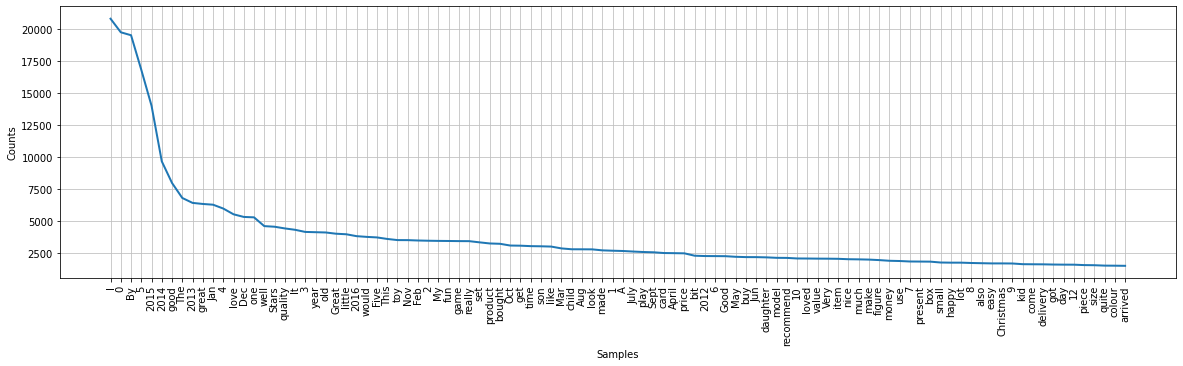

In [0]:
plot_freq_dist(TFIDF,num_words=100) 

Use KMeans clustering to apply clustering to this TFIDF column. Find optimal number of clusters using elbow plot and note your observations for the optimal clusters.

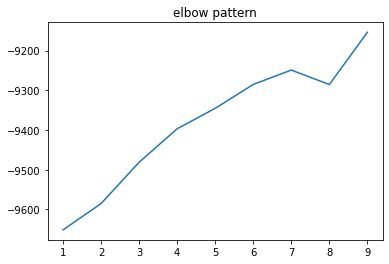

In [0]:
from sklearn.cluster import KMeans
siv=[]
for j in range(1,10):
  kmeans=KMeans(n_clusters=j,max_iter=100,n_init=1)
  kmeans.fit(TFIDF)
  siv.append(kmeans.score(TFIDF))
plt.plot(range(1,10),siv)
plt.title('elbow pattern')
plt.show()

In [0]:
km=KMeans(n_clusters=8,max_iter=100,n_init=1)
km.fit(TFIDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=8, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
km.labels_

array([5, 5, 5, ..., 4, 1, 1], dtype=int32)

In [0]:
nav=sorted(zip(km.labels_,rc["nlpreview"]))


In [0]:
p=sorted(km.labels_)
cl1=0
cl2=0
cl3=0
cl4=0
cl5=0
cl6=0
cl7=0
cl8=0
for i in p:
    if i==0:
        cl1+=1
    elif i==1:
        cl2+=1
    elif i==2:
        cl3+=1
    elif i==3:
        cl4+=1
    elif i==4:
        cl5+=1
    elif i==5:
        cl6+=1
    elif i==6:
      cl7+=1
    elif i==7:
      cl8+=1
tup=(cl1,cl2,cl3,cl4,cl5,cl6,cl7,cl8)
clcount=list(tup)
b=[sum(clcount[0:x+1]) for x in range(0,len(clcount))]
b

[170, 5294, 5486, 5674, 5830, 9458, 9636, 10000]

In [0]:
list1=[list(el) for el in nav]
cluster1=list1[0:b[0]]
cluster2=list1[b[0]:b[1]]
cluster3=list1[b[1]:b[2]]
cluster4=list1[b[2]:b[3]]
cluster5=list1[b[3]:b[4]]
cluster6=list1[b[4]:b[5]]
cluster7=list1[b[5]:b[6]]
cluster8=list1[b[6]:b[7]]
def makingstringfromcluster(cluster1,cluster11,cls1):
  cluster11=[]
  cls1=" "
  for i in range(len(cluster1)):
    cluster1[i].pop(0)
    cluster11=cluster11+cluster1[i]
  for i in cluster11:
    cls1=cls1+i
  return cls1
makingstringfromcluster(cluster1,cluster11,cls1)

' A beautifully made puppet I sure class lot funA delightful Red Dragon glove puppet It well designed easy use My child hour creative fun I get go bedtime tell tale Well worth money Perfect gift kid especially one Welsh Nana 5 0 6 Oct 2013 By Shzbaby 6 Oct 2013 I eye since first discovering best friend expecting In experience hand puppet perfect kid parent age cherished toy one cast aside thrown little darling get bored My next purchase Monkey Hand Puppet Lovely puppet 5 0 1 Jan 2016 By Mrs O 1 Jan 2016 Lovely really good quality puppet My 6 year old daughter got Christmas pleased It well made lovely quality Lots fun dragon puppet 5 0 6 Mar 2012 By Mrs B Robson 6 Mar 2012 bought grandson extremely active imagination put numerous show great fun u He love puppet david welsh dragon 3 0 19 April 2012 By Mrs Hw Petrie 19 April 2012 great puppet arrived well within given arrival date excellent contition The child loved hour fun Well Made 4 0 23 April 2013 By Glamourous 23 April 2013 Bought g

In [0]:
makingstringfromcluster(cluster2,cluster22,cls2)

' 1 Kilo Rhomboid Mix Memory Foam Chips great everything need cushioning I used product make bed elderly Labrador Arthritis comfortable heat body mould memory foam shape lie support joint I also used product make pillow use car sits small back preventing usual back ache I used get commuting I also used product floor cushion recently dog fell back seat car husband brake suddenly avoid box road fell got wedged space Seats I measured space foot well made cushion block gap extend back seat width travel Vets comfort hydrotherapy session She cannot wear car harness anymore benign fatty lump harness sat back wear one device clip onto collar one end clip seat belt also available Amazon Also happy recommend product awful smell either Five Stars 5 0 21 Mar 2015 By Mr R Gilbertson Ricky 21 Mar 2015 Great10 1010 1010 10 worth money wait I reccomend buying spare incase break100 quality100 satisfied quick delivery A1010 thank1200 Count Rubber Band Refills Rainbow Looms Assorted Colors great set kid 

In [0]:
makingstringfromcluster(cluster3,cluster33,cls3)

' ALL GOOD THANK YOUAll goodAll good Thank You muchArrived good time All good work well Son happy ThankArrived time good quality value moneyGOODGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGoodGood carGood detailGood funGood funGood funGood item well pleased good serviceGood price deliveryGood productGood productGood productGood product expectedGood product good value good service ThankGood product serviceGood purchaseGood qualityGood qualityGood qualityGood qualityGood qualityGood qualityGood qualityGood quality arrived timeGood quality good priceGood quality priceGood quality priceGood valueGood valueGood valueGood value moneyGood value moneyGood value moneyGood value priceGood value priceGood would buyI happy It good moneyI happy It good moneyI happy It good moneyI happy It good moneyI happy It good moneyIt I wanted Good value moneyIt good toyIt really goodLook goodNice size seems good quality far Good price Very pleased Bought 2 half year old good fitOn time good productReal

In [0]:
makingstringfromcluster(cluster4,cluster44,cls4)

' A great costumeAlways great detail small scale great valueAs always fantastic quality great deliveryDelivered said great n product great My little one loveGREATGREATGood delivery great carGood product Great service ThanksGood value Great carGrandson love Great purchaseGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreatGreat 5 year oldGreat GiftGreat I wantedGreat I wantedGreat I wantedGreat My little boy pleased Great service well worth money paid product ThankGreat Product great service thankyouGreat ThanksGreat Value money good qualityGreat balloonGreat bannerGreat bannerGreat bit kitGreat buyGreat buyGreat buy great price daughter 10 loveGreat buy thanksGreat classGreat condition great productGreat fanGreat fitGreat funGreat funGreat fun childGreat fun quality toyGreat giftGreat jobGreat little boy moon great quality serviceGreat little girlGreat little handGreat little modelGreat ma

In [0]:
makingstringfromcluster(cluster5,cluster55,cls5)

' A bit expensive excellent detailA well made excellent quality detail painted modelAll ExcellentAn excellent toyBetter expected Excellent value moneyEXCELLENTEXCELLENTExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellentExcellent Always good quality always timeExcellent Christmas present friendExcellent RecommendedExcellent Service Excellent present husbandExcellent Service Model Thank You AAAExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcellent ThankExcel

In [0]:
makingstringfromcluster(cluster6,cluster66,cls6)

' 1Good daughter happy Five Stars 5 0 14 Oct 2015 By peter kemp 14 Oct 2015 nice Four Stars 4 0 11 Aug 2015 By Alan Noddings 11 Aug 2015 It ok Five Stars 5 0 21 Jun 2015 By Libby 21 Jun 2015 Good2nd one I bought First son second gift Nice bright object Great 1 Keeps busy also good looking toy home Not nice cheese mouse string 3 0 24 Sept 2015 By franh 24 Sept 2015 Not nice cheese mouse string simply tied one hole always come Nice attractive toy otherwise Hit miss kid 3 0 21 Jan 2015 By Franklin 21 Jan 2015 Brought Xmas 1 year old sibling 3 year far played much Its lovely solid item tactile touch I hoping interest later grow maybe Lovely toy 5 0 16 Mar 2015 By C Poole 16 Mar 2015 A fab bright chunky toy bought 2 year old loving Very Hungry Caterpillar story moment use prop read Looks good enough eat Five Stars 5 0 19 Jan 2015 By jason r 19 Jan 2015 Awesome little Buy Perfect hand eye coordination Brightly coloured really fun great stocking filler 5 0 4 Jan 2015 By Jane 4 Jan 2015 We spe

In [0]:
makingstringfromcluster(cluster7,cluster77,cls7)

' A lovely little item arrived quick well packaged made well attractive looking pleased purchase It go room doll houseA present grandson collector item Expensive item wanted long time Considering came delivery goodArrived good time describedArrived promptly described would orderArrived quickly described Great giftArrived quickly nice extra item Granddaughter doll houseArrived quickly well packed described happy 5As describedAs describedAs describedAs describedAs describedAs describedAs describedAs describedAs described Great productAs described arrived timeAs described good deviceAs described great product good service prompt delivery statedAs described issueAs described prompt deliveryAs described thanksAwesome item serviceBought sale great item learn kid numberBrilliant itemBrilliant item fast delivery ThankyouCute pan set granddaughter loved quite delicate handle possibly break easily price I would reccomend item In opinion item child 3 4 yearEverything great Item came perfect expec

In [0]:
makingstringfromcluster(cluster8,cluster88,cls8)

' 10 minute defuse tonne bomb ship blow Well What game What boil rolling dice matching card represent bomb managed capture game group imagination set pulse racing worked together defuse bomb You 10 minute time tick realtime dice argued try defuse last bomb make right choice go flame Buy blast Tight quick cooperative fun 5 0 27 Feb 2016 By Nick Welford 27 Feb 2016 Fuse game disarming bomb using dice The concept similar Elder Sign Age War Roll It bomb card requirement must match dice To set lay certain number bomb front player depending player count joint pool bomb middle You shuffle six fuse card deck ready go The first player take number dice player count bag roll Each player must match one dice symbol card could simple colour number dice also stack pyramid must certain order For example may stack number numerically last Once card cleared draw shared pool bomb replace shared card deck resolve fuse card appear return diffused dice bag If use dice one round must rerolled player loses die

# visualize your clusters
 Let us use word cloud visualization.

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plotwordcloud(words):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(words)) 
  plt.figure(figsize=(10, 7)) 
  plt.imshow(wordcloud, interpolation="bilinear") 
  plt.axis('off') 
  plt.show()

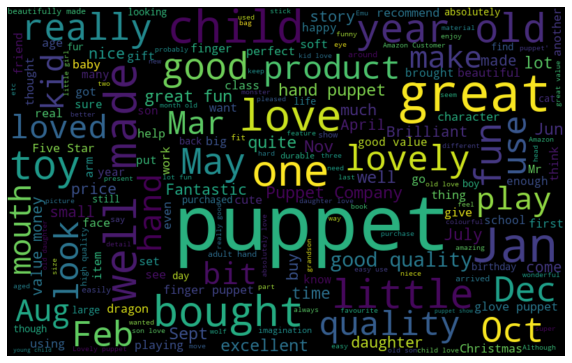

In [0]:
plotwordcloud(cluster1)

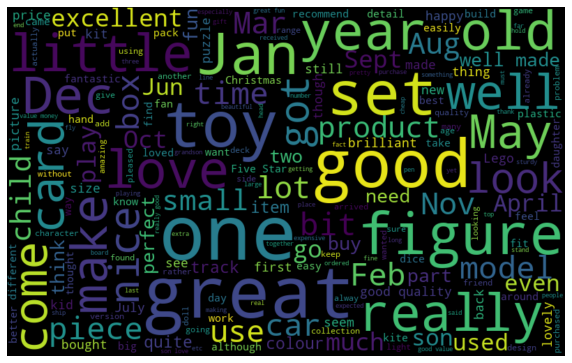

In [0]:
plotwordcloud(cluster2)

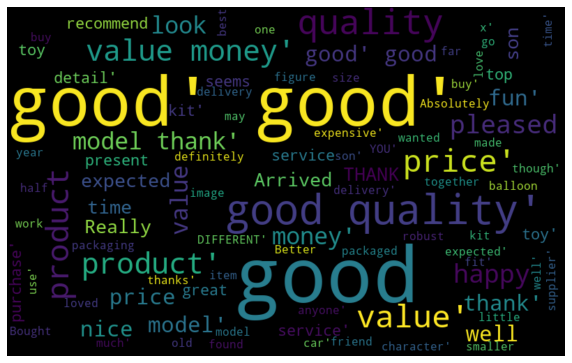

In [0]:
plotwordcloud(cluster3)

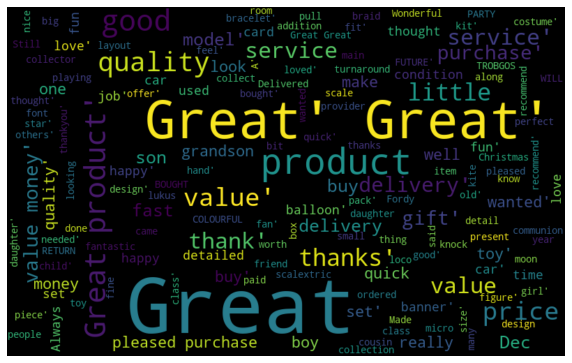

In [0]:
plotwordcloud(cluster4)

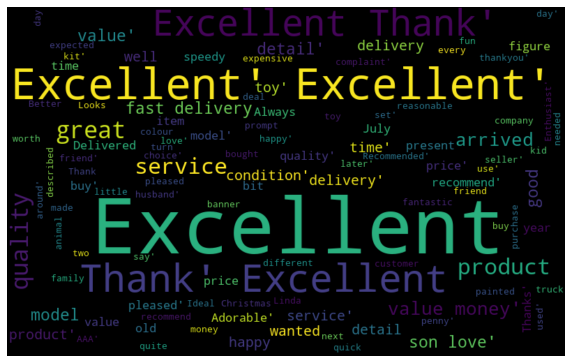

In [0]:
plotwordcloud(cluster5)

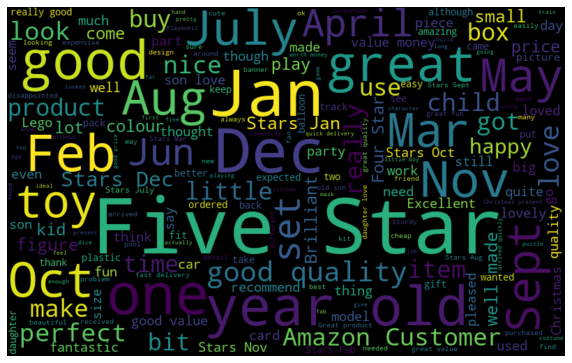

In [0]:
plotwordcloud(cluster6)

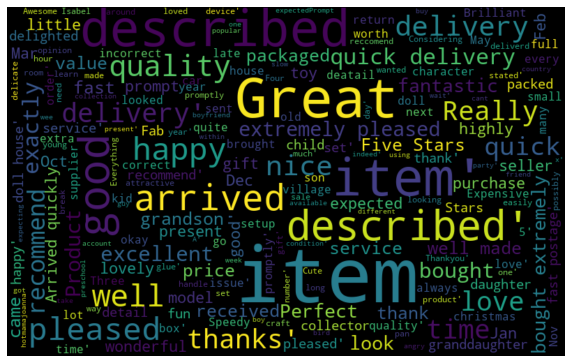

In [0]:
plotwordcloud(cluster7)

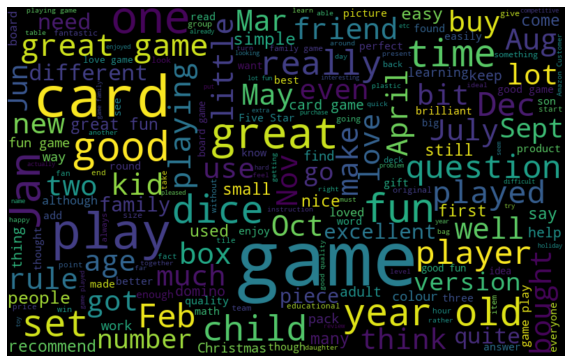

In [0]:
plotwordcloud(cluster8)

#Sentiment Analysis
Ideally it is difficult to do sentiment analysis without having labeled data.

We can do following:
1. Use the rating column and rate 1,2 as negative and 4,5 as positive and reject 3 for now. Then we do 70/30 split of our data into train/test set 
2. Use a lexicon of positive and negative words and calculate score of each review using high score for positive and low score for negative review and pick a threshold above which a review is positive. We can find known positive or negative words in a review and sum their scores up to get a final score.

However, note that text is tricky:

E.g. consider a sentence in review of a smart watch: *The product is not only good but also does not spoil in water.*

It is a positive review but has lot of negaive words not, spoil etc. In these cases one has to go for bi or tri grams, e.g. *not only good* is a positive trigram. *does not spoil* is another one. However adding trigrams make your problem tough. If a review has 10 words, it will have 7 trigrams and 8 bigrams in it, making the features more.


Read [this stack overflow post](https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data). It tells you how to create you train and test data.

Evaluate your model by trying your own reviews.

Process will be:
1. Calculate tf-idf of the review using [transform() method](https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data)
2. run your model on the tf-idf vector and see the sentiment predicted.

In [0]:
x_train=vectorizer.fit_transform(rc["nlpreview"][0:7000])
x_test=vectorizer.transform(rc["nlpreview"][7000:10000])

In [0]:
y_train=rc["sentiment"][0:7000]
y_test=rc["sentiment"][7000:10000]

In [0]:
pos=" "
neg=" "
for j in range(10000):
    if rc["sentiment"][j]==1.0:
        pos=pos+rc["nlpreview"][j]
    elif rc["sentiment"][j]==0.0:
        neg=neg+rc["nlpreview"][j]

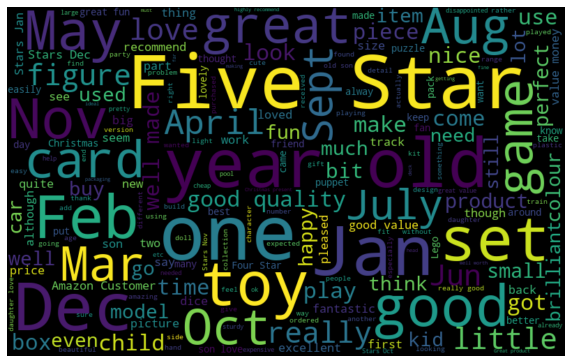

In [0]:
#wordcloud of positive words
plotwordcloud(pos)

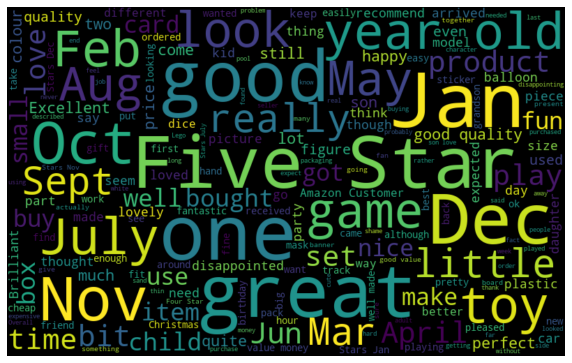

In [0]:
#wordcloud of negative words
plotwordcloud(neg)

In [0]:
from sklearn import svm
from sklearn.metrics import classification_report
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred=classifier.predict(x_test)

In [0]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       166
         1.0       0.94      1.00      0.97      2834

    accuracy                           0.94      3000
   macro avg       0.47      0.50      0.49      3000
weighted avg       0.89      0.94      0.92      3000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
r1 = """i hate this place"""
review= vectorizer.transform([r1])
print(classifier.predict(review))

[1.]


In [0]:
r1 = """i love this place"""
review= vectorizer.transform([r1])
print(classifier.predict(review))

[1.]


In [0]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf


array([[   0,  166],
       [   0, 2834]])

**We can observe that svm is giving positive result to any sentence.so, we may use NGrams to fit this problem**

# Approach 2 - Lexicon way
We will try the lexicons. Rather than doing the work on our own we shall use built in lexicons in NLTK.
You can [read about vader here](http://datameetsmedia.com/staging/3908/vader-sentiment-analysis-explained/)

You can analyze the outcomes. See what threshold you want to pick!

In [306]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
sentiment_analyzer = SentimentIntensityAnalyzer()
scores = []
for sentence in rc["review"]:
  sentiment_score=sentiment_analyzer.polarity_scores(sentence)
  scores.append(sentiment_score)

In [308]:
for sentiment_score in scores[:10]:
  for score in sentiment_score:
         print('{0}: {1},' .format(score, sentiment_score[score]), end='')

neg: 0.0,neu: 0.811,pos: 0.189,compound: 0.9977,neg: 0.0,neu: 0.74,pos: 0.26,compound: 0.8439,neg: 0.063,neu: 0.769,pos: 0.168,compound: 0.9941,neg: 0.0,neu: 0.634,pos: 0.366,compound: 0.886,neg: 0.0,neu: 0.744,pos: 0.256,compound: 0.9939,neg: 0.0,neu: 0.865,pos: 0.135,compound: 0.6486,neg: 0.0,neu: 0.794,pos: 0.206,compound: 0.8439,neg: 0.027,neu: 0.787,pos: 0.186,compound: 0.9951,neg: 0.0,neu: 0.522,pos: 0.478,compound: 0.7506,neg: 0.027,neu: 0.857,pos: 0.115,compound: 0.9657,

In [317]:
s1="i hate this place"
sentiment_score=sentiment_analyzer.polarity_scores(s1)
sentiment_score

{'compound': -0.5719, 'neg': 0.649, 'neu': 0.351, 'pos': 0.0}

In [318]:
s2="i love this place"
sentiment_score=sentiment_analyzer.polarity_scores(s2)
sentiment_score

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.323, 'pos': 0.677}

In [0]:
def lexicon(r,lexdf):
  sentiment_score=sentiment_analyzer.polarity_scores(r)
  lexdf=pd.DataFrame(sentiment_score,index=[0])
  if lexdf["neg"][0]>0.5:
    return "neg"
  elif lexdf["neu"][0]>0.5:
    return "neu"
  elif lexdf["pos"][0]>0.5:
    return "pos"